In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [106]:
# Load the proactive dataset
pros = pd.read_csv('data/proactive_inspections.csv')
pros.head(20)

,As_Of_Date,CAP_CreateDate,CAP_ID,CAP_STATUS,CAP_STATUS_DATE,CAP_ALIAS,CAP_CREATED_BY_confidential,G6_Unique_ID,R3_BUREAU_CODE,Schedule_Date,...,Anc,crm_id,inspector_group,Inspector_Full_Name_confidential,status_des,inspection_type,complaint_confidential,square,lot,address_id
0,2019-08-11 19:45:05.167,2015-03-02 12:34:10.000,PRI1501648,Abated,05/03/2016,Enforce/Compliance/Housing/Proactive Inspection,0xF22FCBE6FAD693398A904285617038A3,1332136,INSPECT,2015-04-17 00:00:00.000,...,ANC 5C,NaN,Proactive,0x900777C2355169AEA72E22F5CAE9B625,Completed,Re-Inspection,"8/3 Units 102, 203\r\nActive\r\nApartment",3674,16,79354
1,2019-08-11 19:45:05.167,2015-03-02 12:34:10.000,PRI1501648,Abated,05/03/2016,Enforce/Compliance/Housing/Proactive Inspection,0xF22FCBE6FAD693398A904285617038A3,1332137,INSPECT,2015-04-17 00:00:00.000,...,ANC 5C,NaN,Proactive,0x900777C2355169AEA72E22F5CAE9B625,Completed,Re-Inspection,"8/3 Units 102, 203\r\nActive\r\nApartment",3674,16,79354
2,2019-08-11 19:45:05.167,2015-02-04 11:32:43.000,PRO1500531,Inspection Scheduled,03/27/2015,Enforce/Compliance/Housing/Proactive,0x875CD42E706029AC0095ADB5B61ABF70,1328846,INSPECT,2015-04-02 00:00:00.000,...,ANC 5B,NaN,Proactive,0x900777C2355169AEA72E22F5CAE9B625,Completed,Initial,"12/4 Units 103, 105, 107, 109\r\nDoris McVea -...",4469,94,149194
3,2019-08-11 19:45:05.167,2015-03-04 12:25:52.000,PRI1501676,NOV Served - Mail,03/16/2015,Enforce/Compliance/Housing/Proactive Inspection,0xF22FCBE6FAD693398A904285617038A3,1551616,INSPECT,2016-12-21 00:00:00.000,...,ANC 5B,NaN,Proactive,0x900777C2355169AEA72E22F5CAE9B625,Completed,Re-Inspection,"4/2 Units 3, 4\r\nActive\r\nApartment",4495,68,81204
4,2019-08-11 19:45:05.167,2015-03-04 12:29:35.000,PRI1501677,NOV Served - Mail,03/16/2015,Enforce/Compliance/Housing/Proactive Inspection,0xF22FCBE6FAD693398A904285617038A3,1551618,INSPECT,2016-12-21 00:00:00.000,...,ANC 5B,NaN,Proactive,0x900777C2355169AEA72E22F5CAE9B625,Completed,Re-Inspection,"4/2 Units 3, 4\r\nActive\r\nApartment",4495,68,81204
5,2019-08-11 19:45:05.167,2015-03-04 12:25:52.000,PRI1501676,NOV Served - Mail,03/16/2015,Enforce/Compliance/Housing/Proactive Inspection,0xF22FCBE6FAD693398A904285617038A3,1551617,INSPECT,2016-12-21 00:00:00.000,...,ANC 5B,NaN,Proactive,0x900777C2355169AEA72E22F5CAE9B625,Completed,Re-Inspection,"4/2 Units 3, 4\r\nActive\r\nApartment",4495,68,81204
6,2019-08-11 19:45:05.167,2015-03-04 12:29:35.000,PRI1501677,NOV Served - Mail,03/16/2015,Enforce/Compliance/Housing/Proactive Inspection,0xF22FCBE6FAD693398A904285617038A3,1551615,INSPECT,2016-12-21 00:00:00.000,...,ANC 5B,NaN,Proactive,0x900777C2355169AEA72E22F5CAE9B625,Completed,Re-Inspection,"4/2 Units 3, 4\r\nActive\r\nApartment",4495,68,81204
7,2019-08-11 19:45:05.167,2015-03-09 12:04:50.000,PRO1500689,NOV Pending,12/16/2016,Enforce/Compliance/Housing/Proactive,0x875CD42E706029AC0095ADB5B61ABF70,1328844,INSPECT,2015-04-02 00:00:00.000,...,ANC 7D,NaN,Proactive,0x900777C2355169AEA72E22F5CAE9B625,Completed,Initial,"12/4 Units 11, 21, 31, 34\r\nActive\r\nApartment",5114,8,290785
8,2019-08-11 19:45:05.167,2015-07-29 11:27:38.000,PRI1503967,Abated,05/02/2017,Enforce/Compliance/Housing/Proactive Inspection,0xF22FCBE6FAD693398A904285617038A3,1604573,INSPECT,2017-05-01 00:00:00.000,...,ANC 8B,NaN,Proactive,0xDB9AF2EE3B9DEAE0607CAB592439630E,Completed,Re-Inspection,"4/2 Units T1, 301\r\nActive\r\nApartment",5842,20,150366
9,2019-08-11 19:45:05.167,2015-07-29 11:27:38.000,PRI1503967,Abated,05/02/2017,Enforce/Compliance/Housing/Proactive Inspection,0xF22FCBE6FAD693398A904285617038A3,1602478,INSPECT,2017-05-01 00:00:00.000,...,ANC 8B,NaN,Proactive,0xDB9AF2EE3B9DEAE0607CAB592439630E,Completed,Re-Inspection,"4/2 Units T1, 301\r\nActive\r\nApartment",5842,20,150366


In [107]:
pros.columns

Index(['As_Of_Date', 'CAP_CreateDate', 'CAP_ID', 'CAP_STATUS',
       'CAP_STATUS_DATE', 'CAP_ALIAS', 'CAP_CREATED_BY_confidential',
       'G6_Unique_ID', 'R3_BUREAU_CODE', 'Schedule_Date', 'Action_Group',
       'Action_Type', 'Action_Designation', 'Completed_Date', 'Request_DD',
       'G6_STATUS', 'REC_DATE', 'R3_DIVISION_CODE', 'INSP_RESULT_TYPE',
       'inspector_user_id_confidential', 'action_by_confidential',
       'inspection_result_comment', 'BLDGNO_confidential', 'STNAME', 'STTYPE',
       'QUAD', 'CITY', 'STATE', 'ZIP', 'Address_confidential', 'group', 'Ward',
       'GIS_CLUSTER', 'Anc', 'crm_id', 'inspector_group',
       'Inspector_Full_Name_confidential', 'status_des', 'inspection_type',
       'complaint_confidential', 'square', 'lot', 'address_id'],
      dtype='object')

## Select key variables

In [108]:
data = pros[['CAP_ID','CAP_STATUS','INSP_RESULT_TYPE','Ward','Action_Type','inspection_type']]

In [109]:
# Convert Ward into dummies
Wards = pd.get_dummies(data['Ward'])

In [110]:
Wards.head()

,1,2,3,4,5,6,7,8
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


In [111]:
# convert result_type into dummies
results = data.INSP_RESULT_TYPE
l=[]
for result in results:
    if result == "APPROVED":
        l.append(1)
    else:
        l.append(0)       

In [112]:
data['INSP_RESULT_TYPE'] = l

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
fdata = pd.concat([data, Wards], axis=1)

In [114]:
fdata = fdata.drop('Ward', axis=1)

In [115]:
fdata.head()

,CAP_ID,CAP_STATUS,INSP_RESULT_TYPE,Action_Type,inspection_type,1,2,3,4,5,6,7,8
0,PRI1501648,Abated,1,1 Day Re-Inspection,Re-Inspection,0,0,0,0,1,0,0,0
1,PRI1501648,Abated,1,30 Day Re-Inspection,Re-Inspection,0,0,0,0,1,0,0,0
2,PRO1500531,Inspection Scheduled,0,Initial,Initial,0,0,0,0,1,0,0,0
3,PRI1501676,NOV Served - Mail,1,1 Day Re-Inspection,Re-Inspection,0,0,0,0,1,0,0,0
4,PRI1501677,NOV Served - Mail,1,1 Day Re-Inspection,Re-Inspection,0,0,0,0,1,0,0,0


## Fit the Kmeans Model

In [116]:
# Select the key variables INSP_RESULT_TYPE and Ward(1,2,3,4,....)
x = fdata[['INSP_RESULT_TYPE', 1, 2, 3, 4, 5, 6, 7, 8]]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,INSP_RESULT_TYPE,1,2,3,4,5,6,7,8,Label
0,1,0,0,0,0,1,0,0,0,2
1,1,0,0,0,0,1,0,0,0,2
2,0,0,0,0,0,1,0,0,0,2
3,1,0,0,0,0,1,0,0,0,2
4,1,0,0,0,0,1,0,0,0,2
5,1,0,0,0,0,1,0,0,0,2
6,1,0,0,0,0,1,0,0,0,2
7,1,0,0,0,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,1,0


In [117]:
# Compute the SSE for k=1 to 10
inertia = [KMeans(n_clusters=i).fit(x).inertia_ for i in range(1,11)]
inertia

[13734.445869837295,
 11132.43418989547,
 9560.782471533126,
 8470.223427474844,
 7026.80063423771,
 5699.509168698998,
 3831.1813555553135,
 2558.4988416492965,
 2184.2776763698666,
 1805.1737297328464]

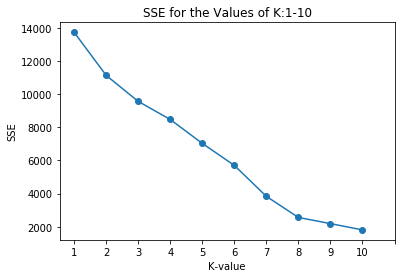

In [118]:
plt.plot(inertia, marker='o')
plt.xlabel('K-value')
plt.ylabel('SSE')
plt.xticks(np.arange(11),(range(1,11)))
plt.title('SSE for the Values of K:1-10')
plt.show()

In [ ]:
# K-means not proper for dummies

In [103]:
# say k=3
kmeans = KMeans(n_clusters=3).fit(x)
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

## Fit the AgglomerativeClustering

In [104]:
# K=3
hclustering = AgglomerativeClustering(n_clusters=3).fit(x)
# predict the  cluster labels
hclustering.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [101]:
# Compare the cluster labels between kmeans and hiearchial clustering
compare = hclustering.labels_ == kmeans.labels_

In [102]:
sum(compare)

0